**important lib**

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import os
import warnings

loading dataset

In [13]:
test_data = pd.read_csv('test.csv')
train_data = pd.read_csv('train.csv')


In [14]:
train_data.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [16]:
train_data.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


In [17]:
train_data.isnull().sum()

,0
profile pic,0
nums/length username,0
fullname words,0
nums/length fullname,0
name==username,0
description length,0
external URL,0
private,0
#posts,0
#followers,0


In [18]:
print("profile pic distribution:\n", train_data['profile pic'].value_counts())
print("fake acc distribution:\n", train_data['fake'].value_counts())

profile pic distribution:
 profile pic
1    404
0    172
Name: count, dtype: int64
fake acc distribution:
 fake
0    288
1    288
Name: count, dtype: int64


data visualisation

<ipython-input-19-d996c4943316>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fake', data=train_data, palette='husl')


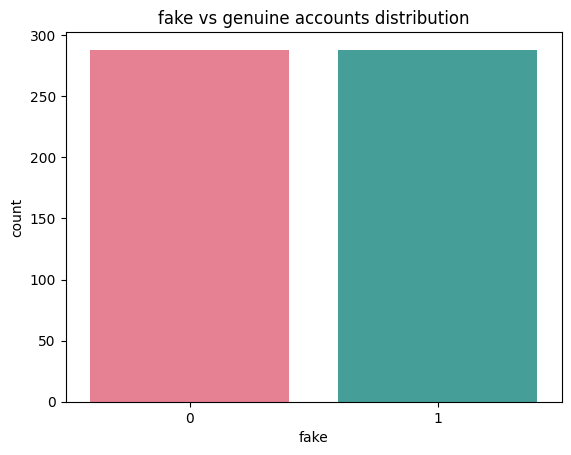

In [19]:
sns.countplot(x='fake', data=train_data, palette='husl')
plt.title('fake vs genuine accounts distribution')
plt.show()

<ipython-input-23-bc06cecb9aef>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='private', data =train_data, palette = 'coolwarm')


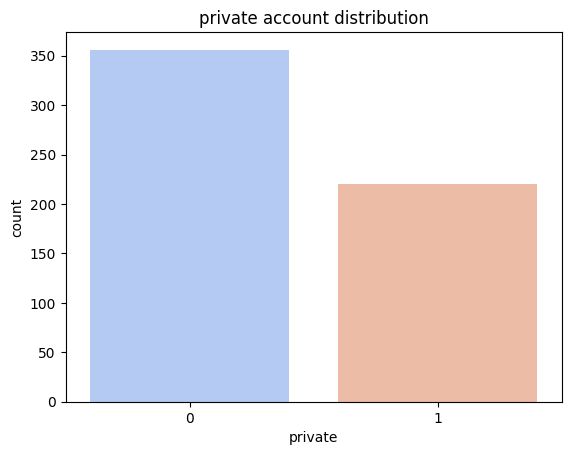

In [23]:
sns.countplot(x='private', data =train_data, palette = 'coolwarm')
plt.title('private account distribution')
plt.show()

<ipython-input-25-6f2104abae60>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='profile pic', data =train_data, palette = 'autumn')


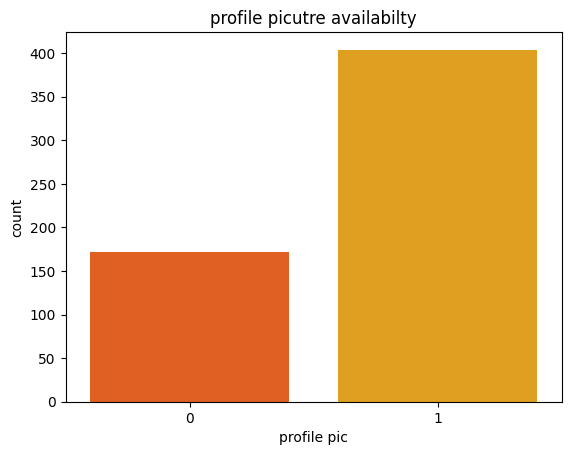

In [25]:
sns.countplot(x='profile pic', data =train_data, palette = 'autumn')
plt.title('profile picutre availabilty')
plt.show()

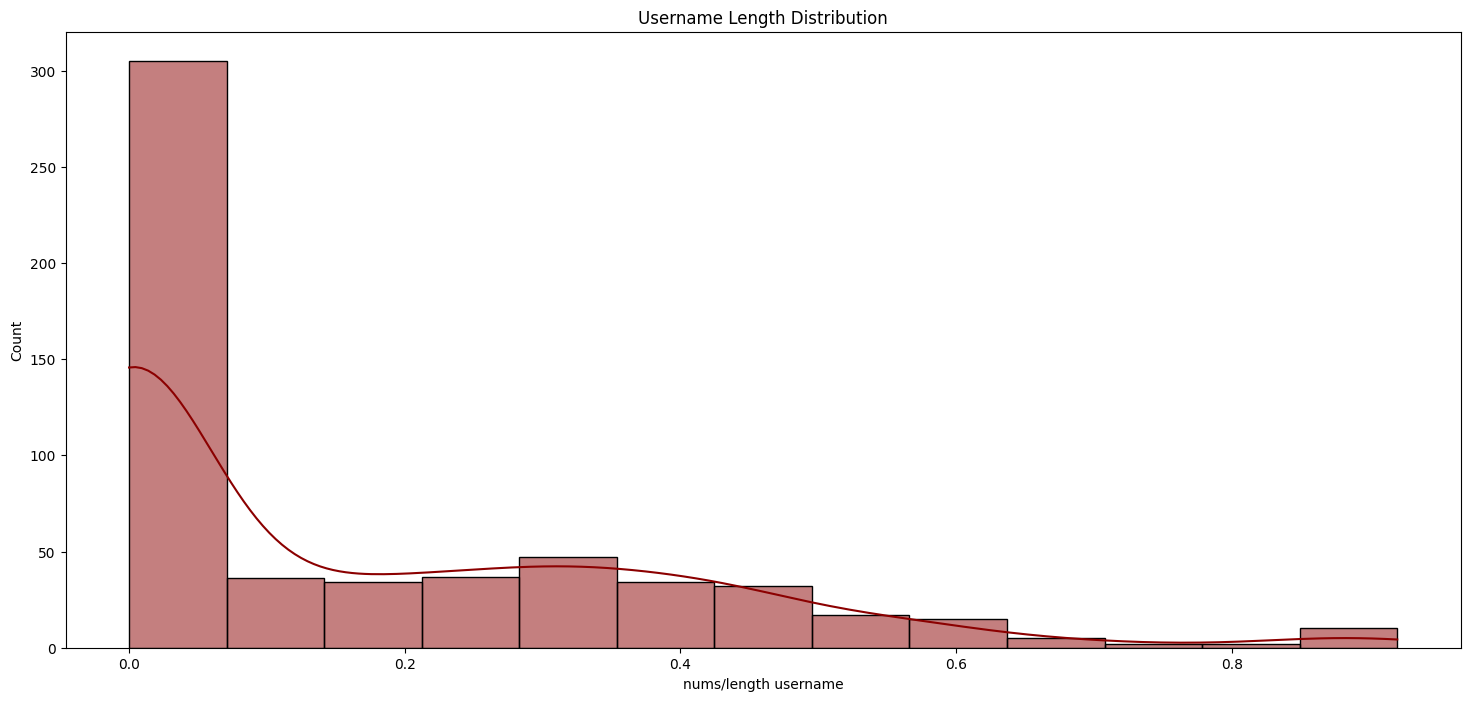

In [26]:
plt.figure(figsize=(18, 8))
sns.histplot(train_data['nums/length username'], kde=True, color='darkred')
plt.title('Username Length Distribution')
plt.show()

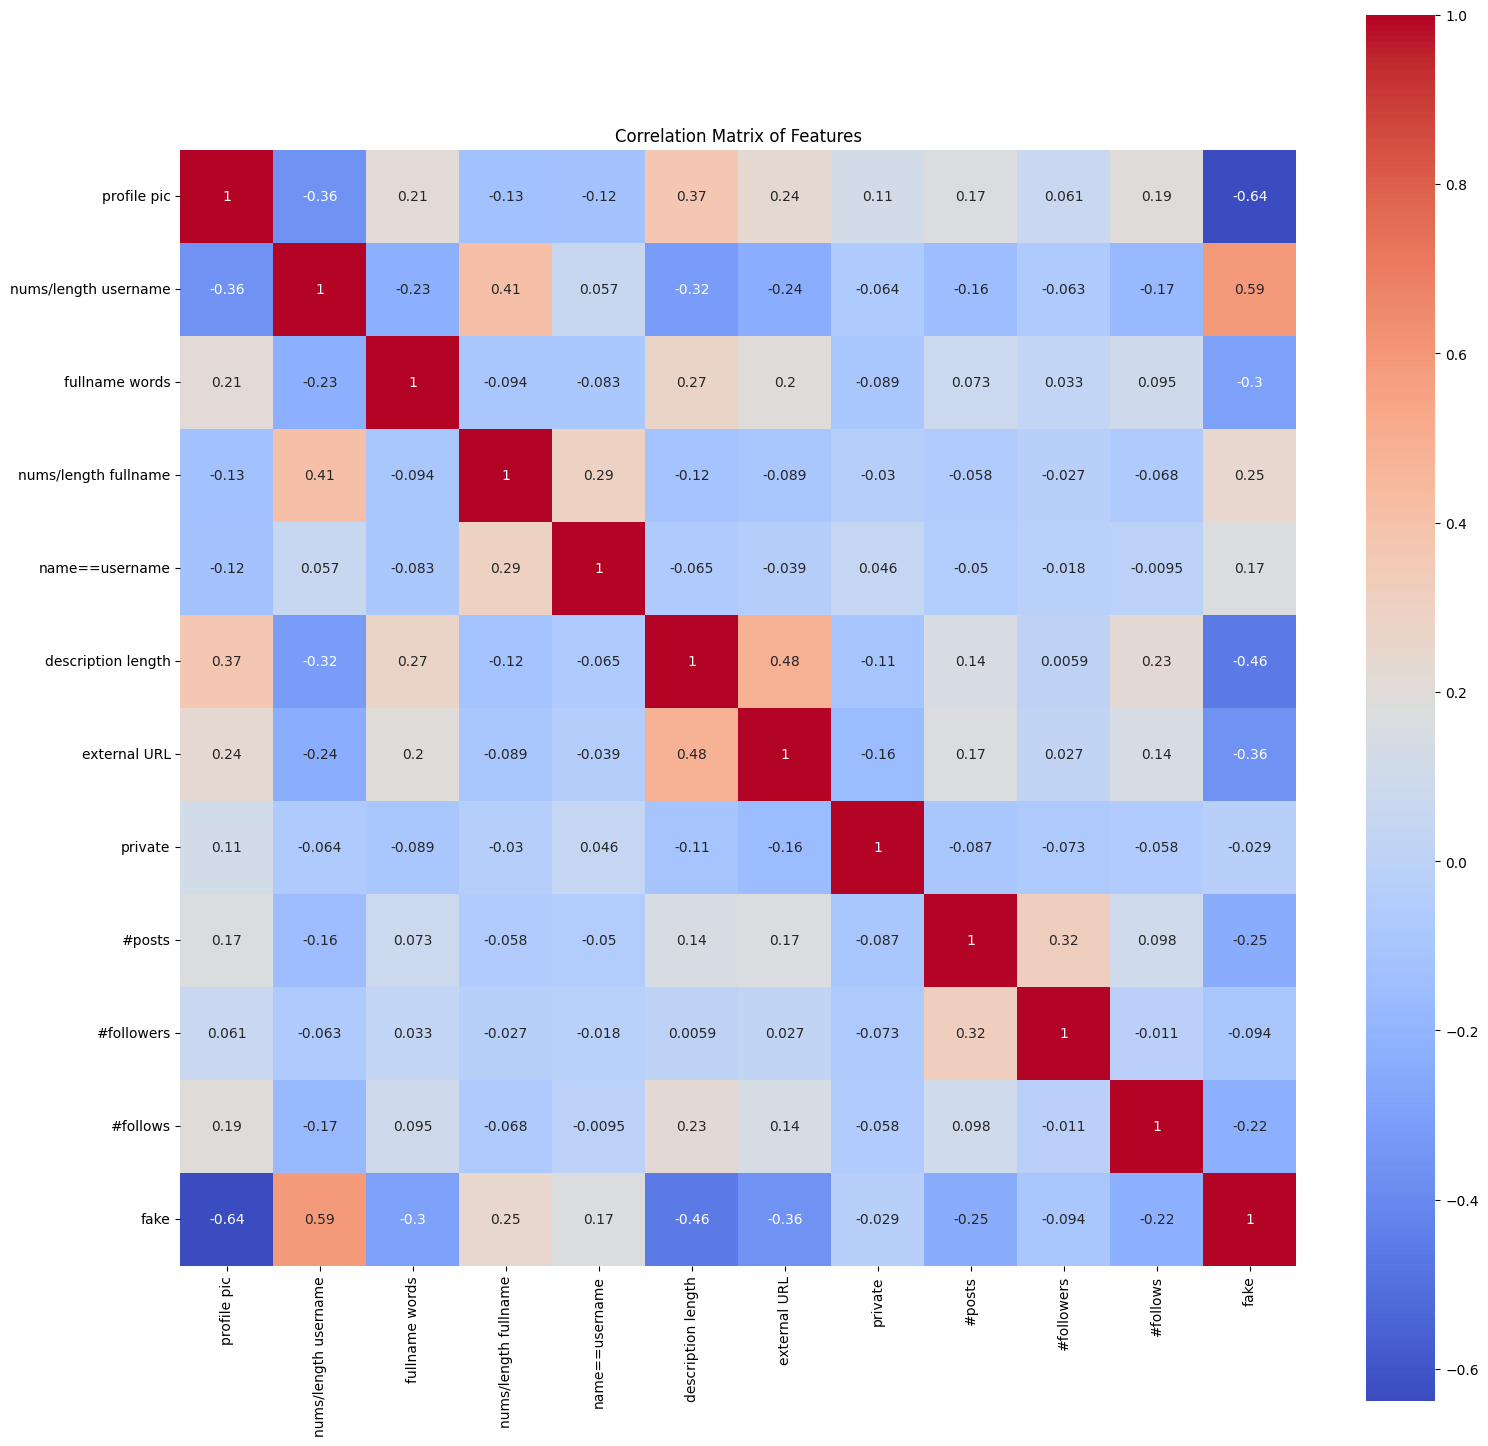

In [27]:
plt.figure(figsize=(18, 18))
corr_matrix = train_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Features')
plt.show()

In [32]:

# Dropping the target variable 'fake' for training the model
X_train_data = train_data.drop(columns=['fake'])
X_test_data = test_data.drop(columns=['fake'])


In [29]:
# Defining target variable
y_train_data = train_data['fake']
y_test_data = test_data['fake']


In [33]:

# Standardizing the feature dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_data)
X_test_scaled = scaler.transform(X_test_data)


In [36]:
# Encoding target into categorical values
y_train_encoded = tf.keras.utils.to_categorical(y_train_data, num_classes=2)
y_test_encoded = tf.keras.utils.to_categorical(y_test_data, num_classes=2)

# Building Neural Network Model
nn_model = tf.keras.Sequential()

# Adding layers to the model
nn_model.add(Dense(64, input_dim=11, activation='relu'))
nn_model.add(Dense(128, activation='relu'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(2, activation='softmax'))

# Model summary to check architecture
nn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,474 (68.26 KB)

 Trainable params: 17,474 (68.26 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
# Model summary to check architecture
nn_model.summary()

# Compiling the model with optimizer and loss function
nn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the model with the training data
history = nn_model.fit(X_train_scaled, y_train_encoded, epochs=50, validation_split=0.1, verbose=1)

1

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,474 (68.26 KB)

 Trainable params: 17,474 (68.26 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.6250 - loss: 0.6377 - val_accuracy: 0.7759 - val_loss: 0.5088
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8914 - loss: 0.3849 - val_accuracy: 0.8966 - val_loss: 0.2569
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8807 - loss: 0.3081 - val_accuracy: 0.9138 - val_loss: 0.1988
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9104 - loss: 0.2479 - val_accuracy: 0.9138 - val_loss: 0.1779
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9010 - loss: 0.2565 - val_accuracy: 0.9483 - val_loss: 0.1506
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9104 - loss: 0.2262 - val_accuracy: 0.9310 - val_loss: 0.1705
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9344 - loss: 0.1739 - val_accuracy: 0.9310 - val_loss: 0.1547
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9099 - loss: 0.2372 - val_accuracy: 0.9483 - val_

1

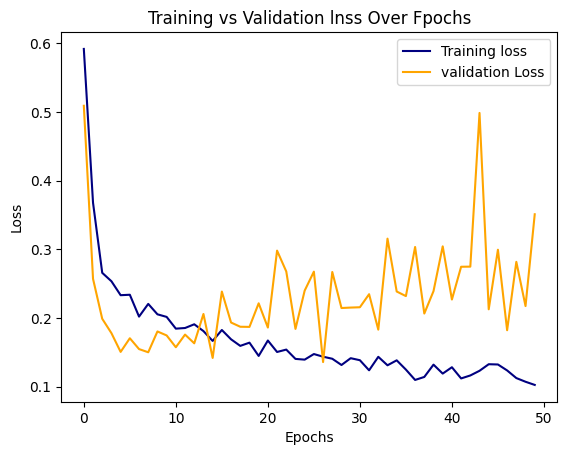

In [42]:
plt.plot(history.history['loss'], label='Training loss', color='navy')
plt.plot(history.history['val_loss'], label='validation Loss', color='orange')
plt.title('Training vs Validation lnss Over Fpochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [44]:
predictions = nn_model.predict(X_test_scaled)

# Converting probabilities to predicted class labels
predicted_classes = np.argmax(predictions, axis=1)
actual_classes = np.argmax(y_test_encoded, axis=1)

# Classification report
print(classification_report(actual_classes, predicted_classes))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
              precision    recall  f1-score   support

           0       0.87      0.90      0.89        60
           1       0.90      0.87      0.88        60

    accuracy                           0.88       120
   macro avg       0.88      0.88      0.88       120
weighted avg       0.88      0.88      0.88       120



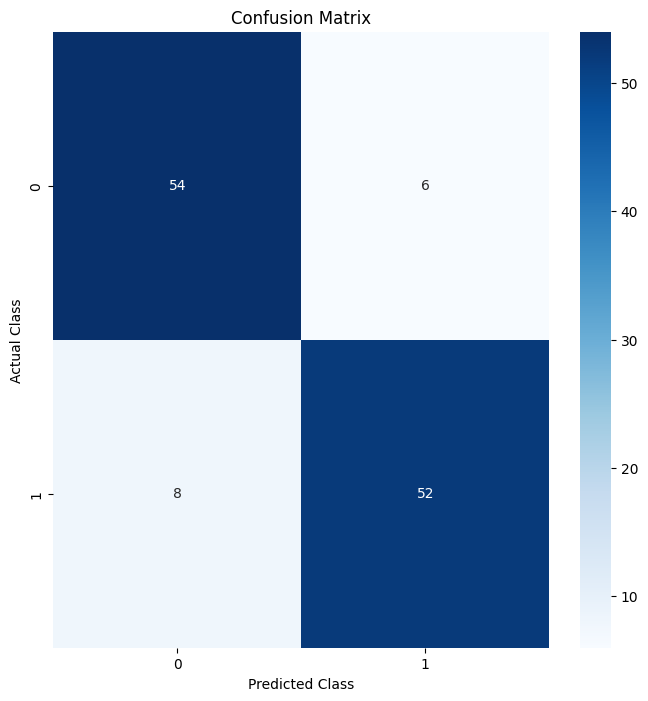

In [50]:
conf__matrix = confusion_matrix(actual_classes, predicted_classes)
plt.figure(figsize=(8, 8))
sns.heatmap(conf__matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()